# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
for city in cities:
    city_name = city.replace(" ", "%20")

# Print the city count to confirm sufficient count
len(cities)


596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [36]:
url = "http://api.openweathermap.org/data/2.5/weather?q="
url
#print(requests.get(url))
units = "imperial"
city_no = []
temp = []
lat = []
long = []
humidity = []
cloud = []
wind = []
country = []
date_time = []
weather_json = []
weather_city = []
city_check = []
import time
page=0

#for a in cities:
    #b=a.replace(" ","%20")
    #city_check.append(b)

for city in cities:
    
    #while True:
        #query_url = f"{url}{city}&appid={weather_api_key}&units={units}"
        #weather_response = requests.get(query_url).json()
        #if weather_response.get('fault'):
            #print(weather_response,page)
            #time.sleep(100)
            #weather_response = requests.get(f"{query_url}&page={page}").json()
        
            #weather_city.extend(weather_response['main']['temp'])
            #page += 1
        #if len(weather_city) >= int(weather_response['main']['temp']):
            #break
    
    #len(weather_city) 
   
    query_url = f"{url}{city}&appid={weather_api_key}&units={units}"
    #print(query_url)
    weather_response = requests.get(query_url).json()
    try:
        weather_response["weather"]
    except KeyError:
        print(f'no {city} data is available')
        continue
    
    lat.append(weather_response['coord']['lat'])
    long.append(weather_response['coord']['lon'])
    temp.append(weather_response['main']['temp'])
    humidity.append(weather_response['main']['humidity'])
    cloud.append(weather_response['clouds']['all'])
    wind.append(weather_response['wind']['speed'])
    country.append(weather_response['sys']['country'])
    date_time.append(weather_response['dt'])
    weather_city.append(city)

    print(f'Name: {weather_response["name"]} ID: {weather_response["id"]}')
        

no yanan data is available
Name: Dorokhovo ID: 565172
Name: Bluff ID: 2206939
no cagayan de tawi-tawi data is available
Name: Mataura ID: 6201424
Name: Yulara ID: 6355222
Name: Hasaki ID: 2112802
Name: Tiksi ID: 2015306
Name: Half Moon Bay ID: 5354943
Name: Kahului ID: 5847411
Name: Berlevåg ID: 780687
Name: Vestmannaeyjar ID: 3412093
Name: Athabasca ID: 5887916
Name: Castro ID: 3466704
Name: Worland ID: 5843495
Name: City of San Pedro ID: 1688781
Name: Dali ID: 1814093
Name: Jamestown ID: 5122534
Name: Margate ID: 2643044
Name: Lagos ID: 2332453
Name: Seoul ID: 1835848
Name: Vardø ID: 777019
Name: Arbagar ID: 2016708
Name: Shaunavon ID: 6145425
Name: Pataias ID: 2265120
Name: Soubre ID: 2598243
Name: Rikitea ID: 4030556
no vaitupu data is available
Name: Punta Arenas ID: 3874787
Name: Troitsko-Pechorsk ID: 481548
Name: Salalah ID: 286621
Name: Tilichiki ID: 2120591
Name: Plouzané ID: 2986626
no illoqqortoormiut data is available
Name: Mar del Plata ID: 3430863
Name: Busselton ID: 2075

In [ ]:
#for city in city_check:

        #lat.append(weather_json['coord']['lat'])
        #temp.append(weather_json['main']['temp'])
        #humidity.append(weather_json['main']['humidity'])
        #cloud.append(weather_json['clouds']['all'])
        #wind.append(weather_json['wind']['speed'])
        #weather_city.append(city)

        #print(f'not enough data for {city}.')


In [43]:
weather_dict = {
    "city": weather_city,
    "lat": lat,
    "long": long,
    "temp": temp,
    "humidity": humidity,
    "cloud": cloud,
    "wind": wind,
    "country":country,
    "date and time":date_time
}



,city,lat,long,temp,humidity,cloud,wind,country,date and time
0,dorokhovo,55.5506,36.3744,30.20,64,75,15.66,RU,1614730193
1,bluff,-46.6000,168.3333,73.99,47,12,11.01,NZ,1614730193
2,mataura,-46.1927,168.8643,73.99,47,28,11.01,NZ,1614730193
3,yulara,-25.2406,130.9889,82.40,34,0,14.97,AU,1614730194
4,hasaki,35.7333,140.8333,40.69,48,20,18.41,JP,1614730194
...,...,...,...,...,...,...,...,...,...
546,lamu,-2.2717,40.9020,76.51,86,2,9.75,KE,1614730343
547,laizhou,37.1717,119.9214,38.53,74,100,14.36,CN,1614730343
548,miles city,46.4083,-105.8406,55.40,26,1,14.97,US,1614730343
549,ternate,0.8000,127.4000,81.34,73,100,6.08,ID,1614730344


In [39]:
print(len(weather_city))
print(len(lat))
print(len(temp))
print(len(humidity))
print(len(cloud))
print(len(wind))

551
551
551
551
551
551


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [46]:
weather_data_df = pd.DataFrame(data=weather_dict)

weather_data_df.to_csv('output.csv')
weather_data_df

,city,lat,long,temp,humidity,cloud,wind,country,date and time
0,dorokhovo,55.5506,36.3744,30.20,64,75,15.66,RU,1614730193
1,bluff,-46.6000,168.3333,73.99,47,12,11.01,NZ,1614730193
2,mataura,-46.1927,168.8643,73.99,47,28,11.01,NZ,1614730193
3,yulara,-25.2406,130.9889,82.40,34,0,14.97,AU,1614730194
4,hasaki,35.7333,140.8333,40.69,48,20,18.41,JP,1614730194
...,...,...,...,...,...,...,...,...,...
546,lamu,-2.2717,40.9020,76.51,86,2,9.75,KE,1614730343
547,laizhou,37.1717,119.9214,38.53,74,100,14.36,CN,1614730343
548,miles city,46.4083,-105.8406,55.40,26,1,14.97,US,1614730343
549,ternate,0.8000,127.4000,81.34,73,100,6.08,ID,1614730344


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [52]:
weather_data_df.loc[weather_data_df['humidity']>100]

#fig1, ax1 = plt.subplots()
#ax1.set_title('City')
#ax1.set_ylabel('Humidity')
#ax1.boxplot(humidity)
#plt.show()

,city,lat,long,temp,humidity,cloud,wind,country,date and time


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

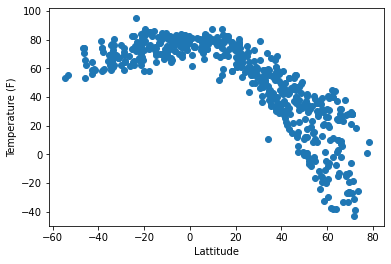

In [56]:
import scipy.stats as st
plt.scatter(lat,temp)
plt.xlabel('Lattitude')
plt.ylabel('Temperature (F)')

plt.show()

## Latitude vs. Humidity Plot

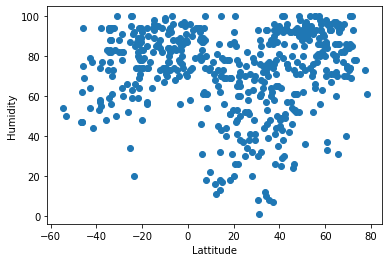

In [57]:
plt.scatter(lat,humidity)
plt.xlabel('Lattitude')
plt.ylabel('Humidity')

plt.show()

## Latitude vs. Cloudiness Plot

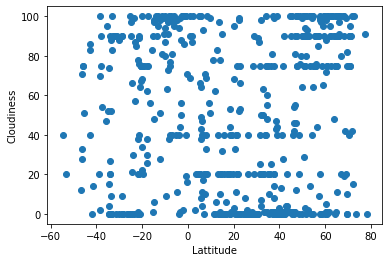

In [58]:
plt.scatter(lat, cloud)
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness')

plt.show()

## Latitude vs. Wind Speed Plot

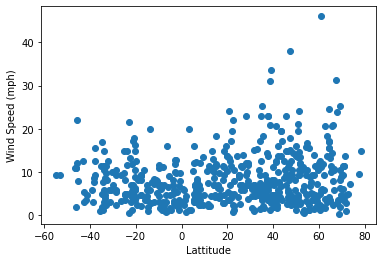

In [59]:
plt.scatter(lat,wind)
plt.xlabel('Lattitude')
plt.ylabel('Wind Speed (mph)')

plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

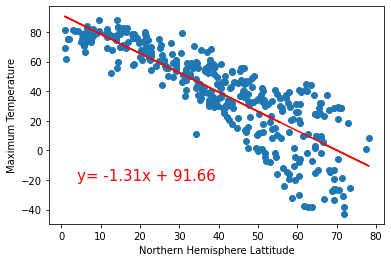

In [64]:
northern_hem_df = weather_data_df.loc[weather_data_df['lat']>0]
x_values =northern_hem_df['lat']
y_values = northern_hem_df['temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,-20),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Lattitude')
plt.ylabel('Maximum Temperature')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

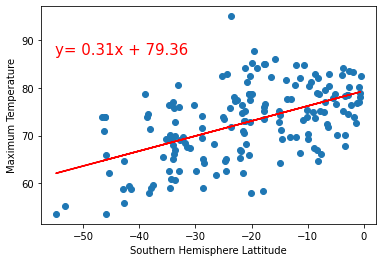

In [67]:
southern_hem_df = weather_data_df.loc[weather_data_df['lat']<0]
x_values =southern_hem_df['lat']
y_values = southern_hem_df['temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,87),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Lattitude')
plt.ylabel('Maximum Temperature')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

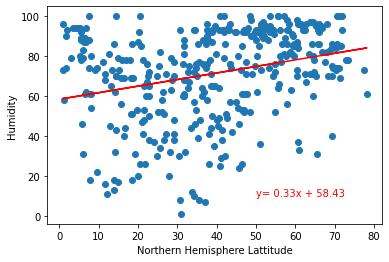

In [70]:
northern_hem_df = weather_data_df.loc[weather_data_df['lat']>0]
x_values =northern_hem_df['lat']
y_values = northern_hem_df['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=10,color="red")
plt.xlabel('Northern Hemisphere Lattitude')
plt.ylabel('Humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

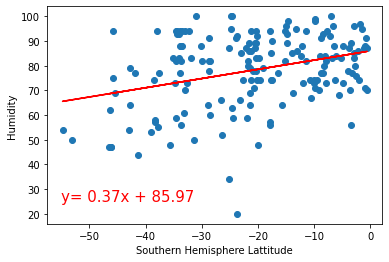

In [72]:
southern_hem_df = weather_data_df.loc[weather_data_df['lat']<0]
x_values =southern_hem_df['lat']
y_values = southern_hem_df['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Lattitude')
plt.ylabel('Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

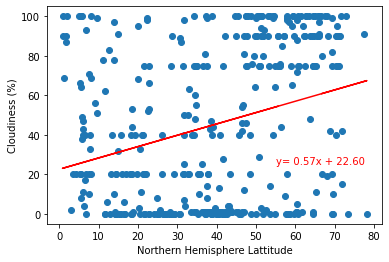

In [75]:
northern_hem_df = weather_data_df.loc[weather_data_df['lat']>0]
x_values =northern_hem_df['lat']
y_values = northern_hem_df['cloud']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(55, 25),fontsize=10,color="red")
plt.xlabel('Northern Hemisphere Lattitude')
plt.ylabel('Cloudiness (%)')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

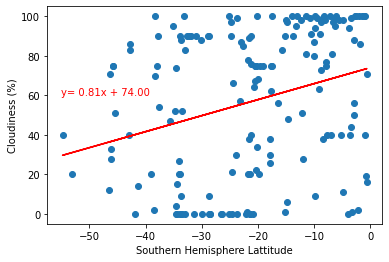

In [77]:
southern_hem_df = weather_data_df.loc[weather_data_df['lat']<0]
x_values =southern_hem_df['lat']
y_values = southern_hem_df['cloud']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=10,color="red")
plt.xlabel('Southern Hemisphere Lattitude')
plt.ylabel('Cloudiness (%)')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

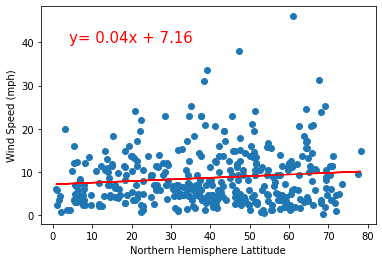

In [80]:
northern_hem_df = weather_data_df.loc[weather_data_df['lat']>0]
x_values =northern_hem_df['lat']
y_values = northern_hem_df['wind']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,40),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Lattitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

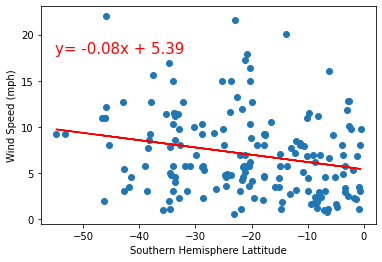

In [83]:
southern_hem_df = weather_data_df.loc[weather_data_df['lat']<0]
x_values =southern_hem_df['lat']
y_values = southern_hem_df['wind']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,18),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Lattitude')
plt.ylabel('Wind Speed (mph)')
plt.show()